# Trabalho 1 - Simulação de um sistema não linear e suas caracteristicas

## Aluno:
- Nome: Felipe Fonseca Rocha
- Matrícula: 2015117096

## Sistema escolhido
O modelo escolhido é o de um deflexão de uma viga com um peso deslocante:

$
\ddot{y} = \frac{P}{EI}(1+(\dot{y})^2)^{1.5}(L-x)
$,

Variáveis de estados:

$
\dot{y_1} = y_2
$

$
\dot{y_2} = \frac{15}{2 \times 10^5 \times 25}(1+(y_2)^2)^{1.5}(200 - x)
$

Os parametros utilizados são

## Classificação do sistema

| Variável   |    Valor             |
|:----------:|:-------------:       |
| $P$        |    $ 15 $            |
| $E$        |    $ 2\times 10^5 $  |
| $I$        |    $ 25 $            |
| $L$        |    $ 20 $            |

In [51]:
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['legend.fontsize'] = 10
#$\omega_n = A_1y_1^4 + B_1y_1³ + C_1 y_1² + D_1y_1 + E_1$

### Definição das equações de estado

In [52]:
def dvCord(x, ux, uy, t):
    # a = 0.258
    # b = 4.033
    # F = 8
    P = 15
    E = 2 * (10 ** 5)
    I = 25
    L = 200

    xd = np.array(np.zeros((2, 1)))
    A = (P / (E * I))
    raiz_cubica = ((1 + x[0] ** 2) ** 1.5)
    print(f' A = {A} raiz = {raiz_cubica}')

    xd[0] = x[1]
    xd[1] = A * raiz_cubica * (L - ux)
    return xd.copy()


### Definição de Runge-Kutta

In [53]:
def rk_cord(x0, ux, uy, h, t):
    # 1st evaluation
    xd = dvCord(x0, ux, uy, t)
    savex0 = x0.copy()
    phi = xd.copy()
    for i in range(len(x0)):
        x0[i] = savex0[i] + 0.5 * h * xd[i]

    # 2nd evaluation
    xd = dvCord(x0.T, ux, uy, t + 0.5 * h)
    phi = (phi + 2 * xd)
    for i in range(len(x0)):
        x0[i] = savex0[i] + 0.5 * h * xd[i]

    # 3rd evaluation
    xd = dvCord(x0, ux, uy, t + 0.5 * h)
    phi = phi + 2 * xd
    for i in range(len(x0)):
        x0[i] = savex0[i] + h * xd[i]

    # 4th evaluation
    xd = dvCord(x0, ux, uy, t + h)

    result_x = x0.copy()
    for i in range(len(x0)):
        result_x[i] = savex0[i] + (phi[i] + xd[i]) * h / 6

    return result_x


### Plot das funções

In [54]:
def run_rk(t:np.ndarray, x:np.ndarray, u, h):
    result = None
    for k in range(1, len(t)):
        result = rk_cord(x[:, k - 1].copy(), u[k], u[k], h, t[k])
        x[:, k] = result
    
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 4))
    ax.set(xlabel='time')
    ax.set(ylabel='u')
    color = ['red', 'green', 'blue', 'yellow', 'orange']
    ax.plot(t, u, color=color[random.randint(0, len(color) - 1)])
    ax.grid()
    fig0, ax0 = plt.subplots(constrained_layout=True, figsize=(8, 4))
    ax0.set(xlabel='time')
    ax0.set(ylabel='x_1')
    color = ['red', 'green', 'blue', 'yellow', 'orange']
    ax0.plot(t, x[0, :], color=color[random.randint(0, len(color) - 1)])
    ax0.grid()
    fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(8, 4))
    ax1.set(xlabel='time')
    ax1.set(ylabel='x_2')
    ax1.plot(t, x[1, :], color=color[random.randint(0, len(color) - 1)])
    ax1.grid()
    # fig2, ax2 = plt.subplots(constrained_layout=True, figsize=(8, 4))
    # ax2.set(xlabel='time')
    # ax2.set(ylabel='x_3')
    # ax2.plot(t, x[2, :], color=color[random.randint(0, len(color) - 1)])
    # ax2.grid()
    plt.show()

### Definições dos parâmetros
 Os parametros concnetrados do sistema em análise são difinidos a seguir sendo que o $\mu$ pode
 definido como muito superior ao valor de refeência para o comportamente do sistema de maneira oscilatóra
 e bem com uma curva característica.

In [55]:
t0 = 0
tf = 200
h = 10
t = np.arange(t0, tf, h)

# [print(i) for i in t if i < 0.1]

x0 = np.array([[0], [0]])

z_x = np.zeros((len(x0), len(t) - 1))
x = x0.copy()
x = np.append(x, z_x, axis=1)

# print(x)

Ts = 1 / 100
omega = (2 * math.pi) / 10
U = 1.2


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200.]
 A = 3e-06 raiz = 1.0
 A = 3e-06 raiz = 1.0
 A = 3e-06 raiz = 1.000337518983663
 A = 3e-06 raiz = 1.0013503037044527
 A = 3e-06 raiz = 1.0013506076253134
 A = 3e-06 raiz = 1.0054072920752164
 A = 3e-06 raiz = 1.008456973420482
 A = 3e-06 raiz = 1.021745012346355
 A = 3e-06 raiz = 1.0217413555471326
 A = 3e-06 raiz = 1.049233296082154
 A = 3e-06 raiz = 1.0580338912964886
 A = 3e-06 raiz = 1.1131573253025688
 A = 3e-06 raiz = 1.1129992079713584
 A = 3e-06 raiz = 1.2051953062300749
 A = 3e-06 raiz = 1.2250960738229688
 A = 3e-06 raiz = 1.3845392654565345
 A = 3e-06 raiz = 1.3833505720967243
 A = 3e-06 raiz = 1.629444236544165
 A = 3e-06 raiz = 1.6758570792286513
 A = 3e-06 raiz = 2.0938968691268447
 A = 3e-06 raiz = 2.0877922782145575
 A = 3e-06 raiz = 2.725079322357558
 A = 3e-06 raiz = 2.856133826372036
 A = 3e-06 raiz = 4.019750609726103
 A = 3e-06 raiz = 3.9899980849467083
 A = 3e-06

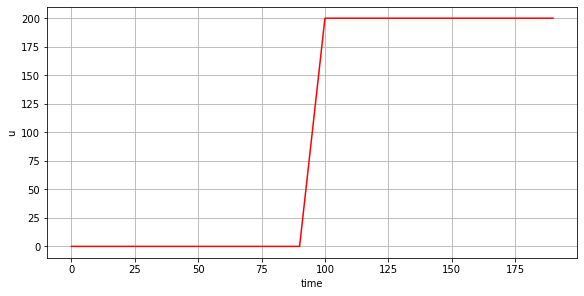

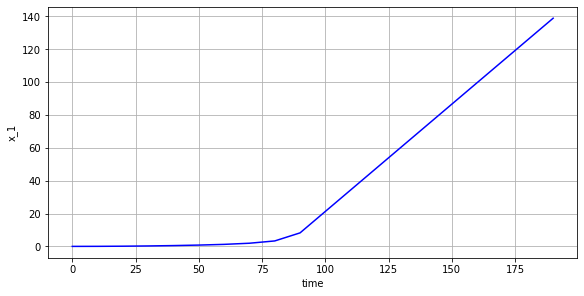

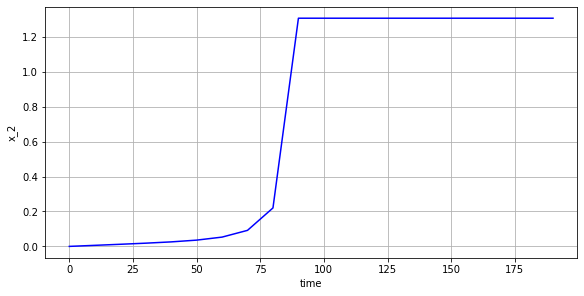

In [56]:
# Degrau
u = 200 * np.append(np.zeros((math.floor(len(t)/2), 1)), np.full((math.floor(len(t) - len(t)/2), 1), 1))
print(u)
run_rk(t.copy() ,x.copy(), u.copy() , h)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190.]
 A = 3e-06 raiz = 1.0
 A = 3e-06 raiz = 1.0
 A = 3e-06 raiz = 1.0003046092123689
 A = 3e-06 raiz = 1.001218622372791
 A = 3e-06 raiz = 1.0012188699046627
 A = 3e-06 raiz = 1.0048794392758853
 A = 3e-06 raiz = 1.0074705755208893
 A = 3e-06 raiz = 1.0190959766307448
 A = 3e-06 raiz = 1.019092703405502
 A = 3e-06 raiz = 1.0428142536065188
 A = 3e-06 raiz = 1.049733514898523
 A = 3e-06 raiz = 1.0957082746151847
 A = 3e-06 raiz = 1.0955975897008572
 A = 3e-06 raiz = 1.170862387670777
 A = 3e-06 raiz = 1.185007060651526
 A = 3e-06 raiz = 1.3092280816828665
 A = 3e-06 raiz = 1.3085167047451904
 A = 3e-06 raiz = 1.4941655177671807
 A = 3e-06 raiz = 1.5225992507726924
 A = 3e-06 raiz = 1.815244048337514
 A = 3e-06 raiz = 1.812232827304465
 A = 3e-06 raiz = 2.2365047630251444
 A = 3e-06 raiz = 2.3004283486118573
 A = 3e-06 raiz = 2.9808167465169952
 A = 3e-06 raiz = 2.969565848588788
 A = 3e-06

<ipython-input-52-77183ddc908b>:12: RuntimeWarning: overflow encountered in double_scalars
  raiz_cubica = ((1 + x[0] ** 2) ** 1.5)


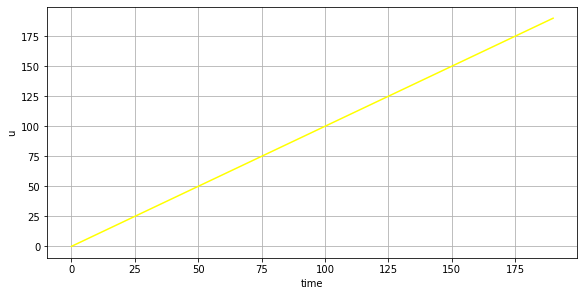

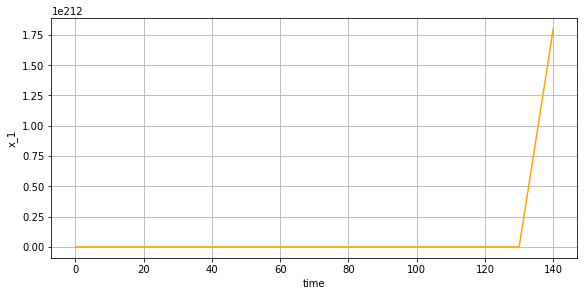

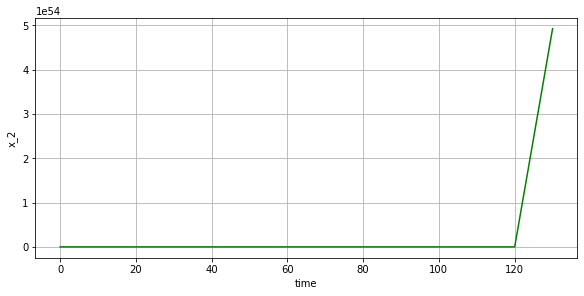

In [57]:
# Sequencia de Degrau
level = np.arange(0, 200, 10)
width = math.floor(len(t)/len(level))
ones = np.ones((1,width))
arr = [ level[i] * j  for i in range(len(level)) for j in ones]
u = np.array((arr)).flatten()
print(u)
run_rk(t.copy() ,x.copy(), u.copy() , h)
print("SEQUENCE")

In [58]:
# Pulso
u = 100 * np.append(np.append(np.zeros((math.floor(len(t)/3), 1)), np.full((math.floor(len(t)/3), 1), 1)), np.zeros((math.floor(len(t)/3), 1)))
run_rk(t.copy() ,x.copy(), u.copy() , h)

 A = 3e-06 raiz = 1.0
 A = 3e-06 raiz = 1.0
 A = 3e-06 raiz = 1.000337518983663
 A = 3e-06 raiz = 1.0013503037044527
 A = 3e-06 raiz = 1.0013506076253134
 A = 3e-06 raiz = 1.0054072920752164
 A = 3e-06 raiz = 1.008456973420482
 A = 3e-06 raiz = 1.021745012346355
 A = 3e-06 raiz = 1.0217413555471326
 A = 3e-06 raiz = 1.049233296082154
 A = 3e-06 raiz = 1.0580338912964886
 A = 3e-06 raiz = 1.1131573253025688
 A = 3e-06 raiz = 1.1129992079713584
 A = 3e-06 raiz = 1.2051953062300749
 A = 3e-06 raiz = 1.2250960738229688
 A = 3e-06 raiz = 1.3845392654565345
 A = 3e-06 raiz = 1.3833505720967243
 A = 3e-06 raiz = 1.629444236544165
 A = 3e-06 raiz = 1.6758570792286513
 A = 3e-06 raiz = 2.0938968691268447
 A = 3e-06 raiz = 2.0877922782145575
 A = 3e-06 raiz = 2.725079322357558
 A = 3e-06 raiz = 2.789832337533836
 A = 3e-06 raiz = 3.785050667791716
 A = 3e-06 raiz = 3.7690832885266623
 A = 3e-06 raiz = 5.194103099191928
 A = 3e-06 raiz = 5.405243309502114
 A = 3e-06 raiz = 7.8074252131553905
 A =

<ipython-input-52-77183ddc908b>:12: RuntimeWarning: overflow encountered in double_scalars
  raiz_cubica = ((1 + x[0] ** 2) ** 1.5)


IndexError: index 18 is out of bounds for axis 0 with size 18

In [ ]:
# Crescente
u = 200 * np.array([U * math.sin(omega * i * Ts) for i in t])  # np.zeros((len(t), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

In [ ]:
# Senoidal
u = 200 * np.sin(np.array(t))  # np.zeros((len(t), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)


# Referência
[Teoria de simulação de Van Der Pol](https://hal.archives-ouvertes.fr/hal-00734058/document)

[Teoria do uso de modelo de Van Der Pol](https://www.johndcook.com/blog/2019/12/26/van-der-pol-period/)

[Trabalho prático utilizado para o modelo](https://repository.library.northeastern.edu/files/neu:336724/fulltext.pdf)

[Controle e Sistemas](ftp://ftp.dca.fee.unicamp.br/pub/docs/vonzuben/ea932_03/aulas/topico7_03.pdf)